In [1]:
# Add my own libraries to the path
import sys
sys.path.append('/Users/Mead/Physics/library/python')

# Import libraries
import mead_cosmology as cosm
import numpy as np
import matplotlib.pyplot as plt

# Inline plots
%matplotlib inline

cosm.assign_cosmology()
cosm.initialise_cosmology()
cosm.print_cosmology()
cosm.initialise_distances()
cosm.initialise_growth()

Assign_cosmology: Setting cosmological parameters
Assign_cosmology: Done

Initialise_cosmology: min -> max in a_tab: 1e-05 -> 1.0
Initialise_cosmology: min -> max in a_logtab: 1e-05 -> 1.0
Initialise_cosmology: min -> max in a_lintab: 0.0 -> 1.0

Print_cosmology: Parameters
Print_cosmology: Om_r: 0.0
Print_cosmology: Om_m: 0.3
Print_cosmology: Om_v: 0.0
Print_cosmology: Om_w: 0.7
Print_cosmology: Om: 1.0
Print_cosmology: Dark energy: LCDM
Print_cosmology: Done

Initialise_distances: Horizon size [dimensionless]: 3.305075828454602
Initialise_distances: Horizon size [Mpc/h]: 9908.617333706896
Initialise_distances: Universe age [dimensionless]: 0.964099381639469
Initialise_distances: Universe age [Gyr/h]: 9.426963753670728
Initialise_distances: r(0): 3.3050758284546022
Initialise_distances: rp(0): 0.0
Initialise_distances: t(0): 0.0

Initialise_growth: Solving growth equations
Initialise_growth: ODE solved
Initialise_growth: Creating interpolators
Initialise_growth: Interpolators done
Ini

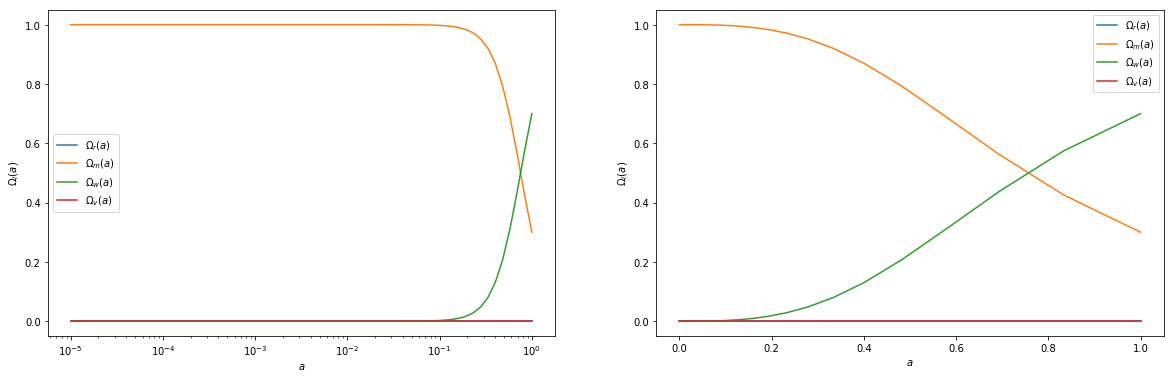

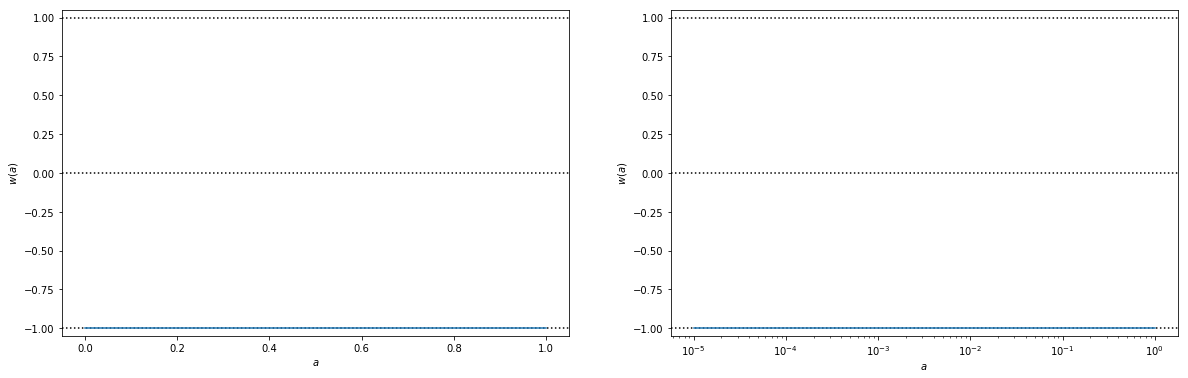

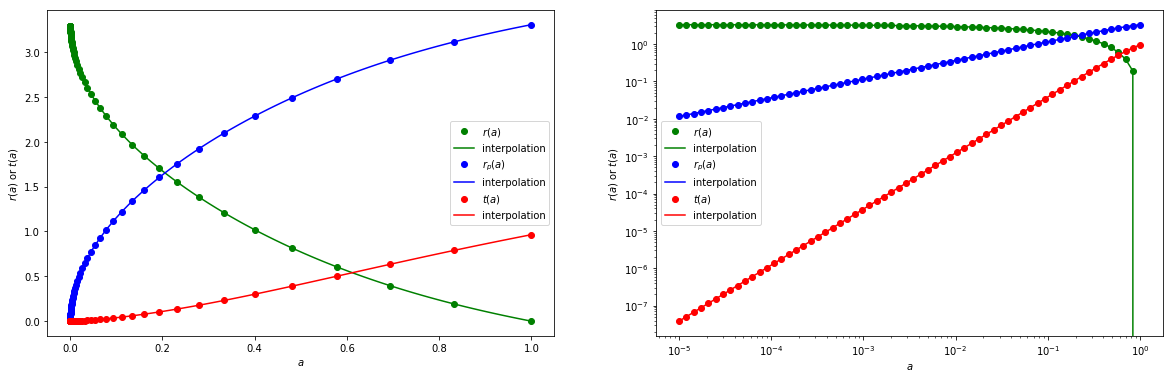

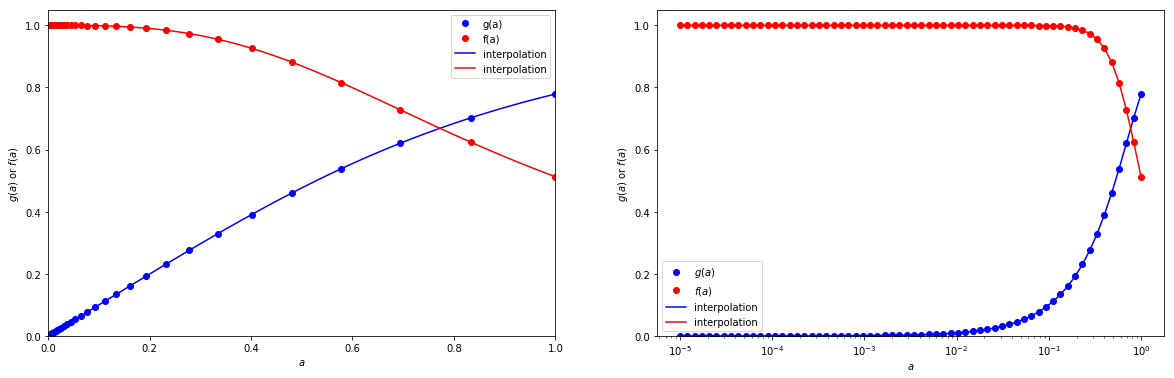

In [2]:
cosm.plot_omegas()
cosm.plot_distances()
cosm.plot_growth()

In [3]:
print('Om_m:', cosm.Om_m)
print('g(a=0.5)', cosm.g(0.5))
print()

Om_m: 0.3
g(a=0.5) 0.4765845568812686



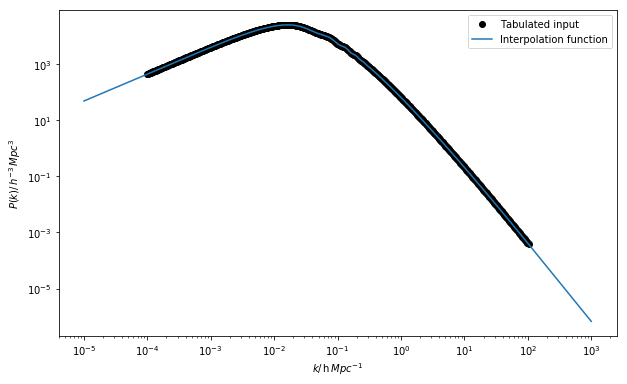

In [8]:
k_tab, Pk_tab = cosm.read_CAMB('/Users/Mead/Physics/library/python_demos/data/CAMB_matterpower_z0.dat')

Pk = cosm.create_Pk(k_tab,Pk_tab)

#Set a k range for plot to check interpolation
kmin=1e-5
kmax=1e3
nk=1000
k=np.exp(np.linspace(np.log(kmin),np.log(kmax),nk))

#Plot the power spectrum
plt.figure(1,figsize=(10,6))
plt.loglog(k_tab,Pk_tab,'ko',label='Tabulated input')
plt.loglog(k,Pk(k),'-',label='Interpolation function')
#plt.loglog(k,Pk_HZ(k),'-',label='Harrizon-Zel''docvich')
plt.xlabel(r'$k /\,\mathrm{h}\,Mpc^{-1}$')
plt.ylabel(r'$P(k) /\,h^{-3}\,Mpc^3$')
plt.legend()
plt.show()

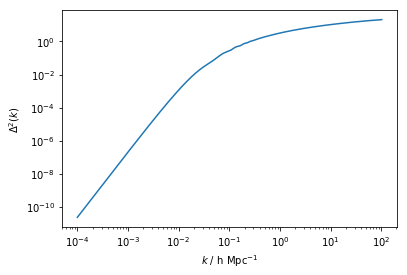

In [9]:
# Add my own libraries to the path
import sys
sys.path.append('/Users/Mead/Physics/library/python')

import numpy as np
import mead_cosmology as cosmology
import mead_interpolation as interpolation
import mead_calculus as calculus
import mead_maths as maths
from scipy import integrate
import matplotlib.pyplot as plt

# Inline plots
%matplotlib inline

lin_interpolation = True
log_interpolation = True
lin_table = True
log_table= True

#Import P(k) from CAMB file
k_tab,Pk_tab=cosmology.read_CAMB('data/CAMB_matterpower_z0.dat')

#Convery P(k) to Delta^2(k)
Dk_tab=(4.*np.pi)*Pk_tab*(k_tab**3)/(2.*np.pi)**3

#Plot Delta^2(k)
plt.loglog(k_tab,Dk_tab)
plt.xlabel(r'$k$ / h Mpc$^{-1}$')
plt.ylabel(r'$\Delta^2(k)$')
plt.show()

#Create interpolation function for Delta^2(k)
Dk = interpolation.log_interp1d(k_tab,Dk_tab,fill_value='extrapolate')

In [10]:
#Standard integrand
def sigma_integrand(k,R):
    return Dk(k)*(maths.Tophat(k*R)**2)/k

#Logarithmic integrand
def sigma_integrand_log(k,R):
    k=np.exp(k)
    return Dk(k)*(maths.Tophat(k*R)**2)

#Function to calculate the integral
#def sigma(R):
#    kmin=1e-3
#    kmax=1e2
#    #sig2,_=integrate.quad(sigma_integrand, kmin, kmax, args=(R,), limit=50)
#    #sig2,_=integrate.quad(sigma_integrand_log, np.log(kmin), np.log(kmax), args=(R,), limit=50)
#    sig2,_=mead.integrate_quad_log(sigma_integrand, kmin, kmax, args=(R,), limit=50)
#    return np.sqrt(sig2),_

#Set the range in 'R' to plot
#rmin=1e-2
#rmax=10
#nr=100
#R=mead.logspace(rmin,rmax,nr)
R=8.
print('R [Mpc/h]:', R)
print()

#Range for the integration of interpolation function
kmin=k_tab[1]
kmax=k_tab[-1]
print('kmin [h/Mpc]:', kmin)
print('kmax [h/Mpc]:', kmax)
print()

#Integrate interpolation function in linear space
if(lin_interpolation):
    sigma_squared,_=integrate.quad((lambda k, R: Dk(k)*(maths.Tophat(k*R)**2)/k),kmin,kmax,args=(R,))
    print('Linear integral via interpolation function')
    print('sigma:', np.sqrt(sigma_squared))
    print('error:', _)
    print()

#Integrate interpolation function in log space
if(log_interpolation):
    sigma_squared,_=calculus.integrate_quad_log(lambda k, R: Dk(k)*(maths.Tophat(k*R)**2)/k,kmin,kmax,args=(R,))
    print('Logarthimic integral via interpolation function')
    print('sigma:', np.sqrt(sigma_squared))
    print('error:', _)
    print()

#Use Simpson's method on the array
if(lin_table):
    inttab=Dk_tab*(maths.Tophat(k_tab*R)**2)/k_tab
    sigma_squared=integrate.simps(inttab,k_tab)
    print('Integral linearly via table')
    print('sigma:', np.sqrt(sigma_squared))
    print()
    
#Use Simpson's method on the array, but logarithmically
if(log_table):
    inttab=Dk_tab*(maths.Tophat(k_tab*R)**2)#/k_tab
    sigma_squared=integrate.simps(inttab,np.log(k_tab))
    print('Integral logarithmically via table')
    print('sigma:', np.sqrt(sigma_squared))
    print()

R [Mpc/h]: 8.0

kmin [h/Mpc]: 0.00010202
kmax [h/Mpc]: 102.479

Linear integral via interpolation function
sigma: 0.8001239094761623
error: 4.7796109233111395e-05

Logarthimic integral via interpolation function
sigma: 0.800119095027486
error: 1.292396215590852e-05

Integral linearly via table
sigma: 0.8001285673541334

Integral logarithmically via table
sigma: 0.8001285799935498



/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/Users/Mead/Physics/library/python/mead_calculus.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  o